In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../Data/airline_passengers.csv', parse_dates=True, index_col=0)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Thousands of Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [4]:
df.index.freq = 'MS'

In [5]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [6]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [7]:
train = df.iloc[:108]

In [8]:
test = df.iloc[108:]

# Model

In [9]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [10]:
fitted_model = ExponentialSmoothing(train['Thousands of Passengers'], trend='mul', seasonal='mul',seasonal_periods=12 ).fit()

In [11]:
test_pred = fitted_model.forecast(36)

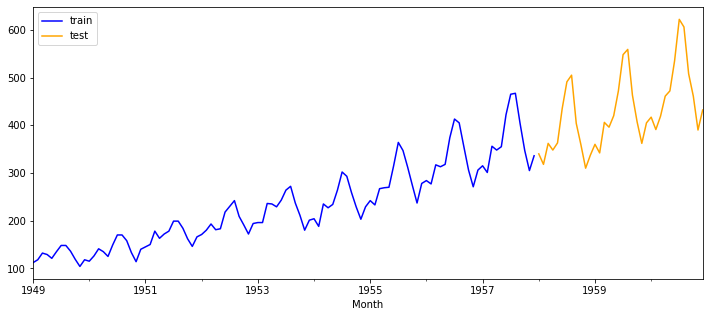

In [12]:
plt.figure(figsize=(12,5))
train['Thousands of Passengers'].plot(label='train', color='b')
test['Thousands of Passengers'].plot(label='test', color='orange')
plt.legend();

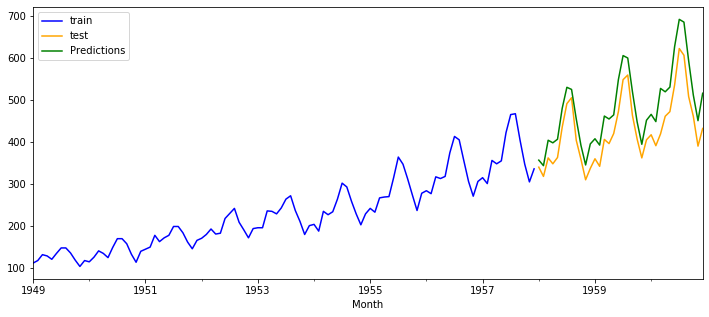

In [13]:
plt.figure(figsize=(12,5))
train['Thousands of Passengers'].plot(label='train', color='b')
test['Thousands of Passengers'].plot(label='test', color='orange')
test_pred.plot(label='Predictions', color='g')
plt.legend();

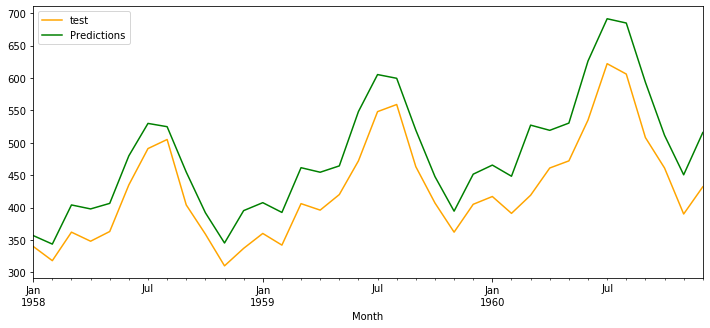

In [14]:
plt.figure(figsize=(12,5))
test['Thousands of Passengers'].plot(label='test', color='orange')
test_pred.plot(label='Predictions', color='g')
plt.legend();

# Evaluation Metrics

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [16]:
test.describe()

,Thousands of Passengers
count,36.000000
mean,428.500000
std,79.329152
min,310.000000
25%,362.000000
50%,412.000000
75%,472.000000
max,622.000000


In [17]:
print(mean_absolute_error(test['Thousands of Passengers'], test_pred))
print(mean_squared_error(test['Thousands of Passengers'], test_pred))
print(np.sqrt(mean_squared_error(test['Thousands of Passengers'], test_pred)))


53.163265674782
3200.5396503496227
56.57331217411283


# Forecating the future

In [18]:
model = ExponentialSmoothing(df['Thousands of Passengers'], trend='mul', seasonal='mul', seasonal_periods=12).fit()

In [19]:
future = model.forecast(36)

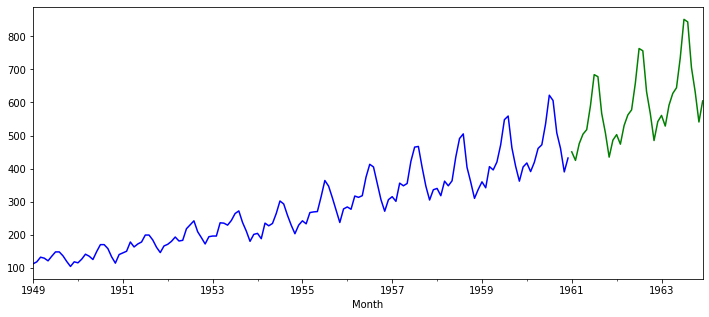

In [20]:
plt.figure(figsize=(12,5))
df['Thousands of Passengers'].plot(label='Available Data', color='b')
future.plot(label='Future', color='g')

# Stationarity

Time series data is said to be stationary if it does not exhibit trends or seasonality. That is, the mean, variance and covariance should be the same for any segment of the series, and are not functions of time.

In [21]:
df2 = pd.read_csv('../Data/samples.csv',index_col=0,parse_dates=True)
df2.head()

,a,b,c,d
1950-01-01,36,27,0,67
1950-02-01,58,22,3,31
1950-03-01,61,17,5,67
1950-04-01,37,15,8,47
1950-05-01,66,13,8,62


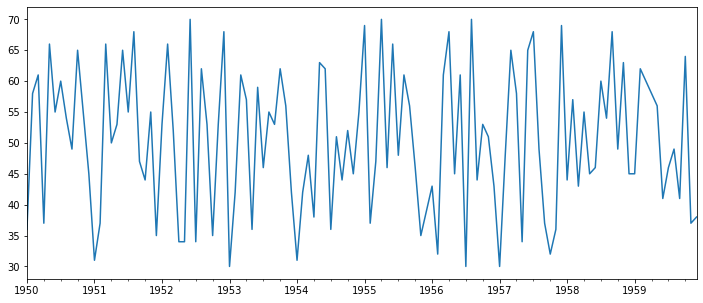

In [22]:
df2['a'].plot(figsize=(12,5))
#stattionary data because no trends or seasonal distinctions can be seen

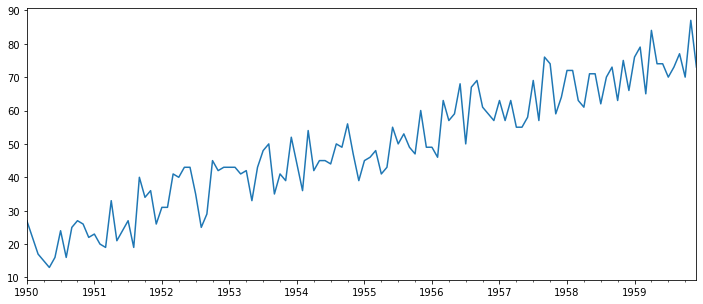

In [23]:
df2['b'].plot(figsize=(12,5))
# trend can be seen but no seasonal distinctions

Non-stationary data can be made to look stationary through differencing. A simple method called first order differencing calculates the difference between consecutive observations.

     𝑦′𝑡=𝑦𝑡−𝑦𝑡−1 
In this way a linear trend is transformed into a horizontal set of values.

In [24]:
df2['d1b'] = df2['b'] - df2['b'].shift(1)

df2[['b','d1b']].head()

# subtract every value with the next value

,b,d1b
1950-01-01,27,NaN
1950-02-01,22,-5.0
1950-03-01,17,-5.0
1950-04-01,15,-2.0
1950-05-01,13,-2.0


In [25]:
from statsmodels.tsa.statespace.tools import diff

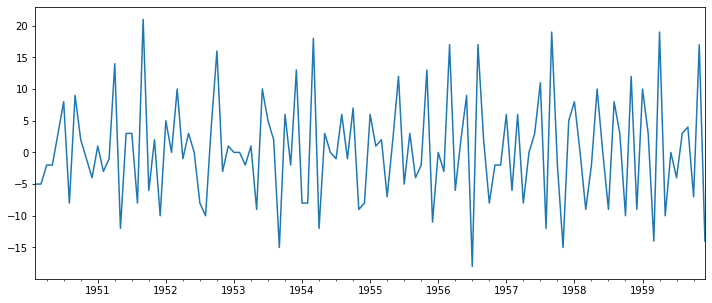

In [26]:
diff(df2['b'], k_diff=1).plot(figsize=(12,5));

# data converted from non-stationary to stationary

# ACF / Autocorrelation Plot

In [27]:
df1 = pd.read_csv('../Data/DailyTotalFemaleBirths.csv', index_col=0, parse_dates=True)

In [28]:
df1.head()

# daily data

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


In [29]:
df1.index

DatetimeIndex(['1959-01-01', '1959-01-02', '1959-01-03', '1959-01-04',
               '1959-01-05', '1959-01-06', '1959-01-07', '1959-01-08',
               '1959-01-09', '1959-01-10',
               ...
               '1959-12-22', '1959-12-23', '1959-12-24', '1959-12-25',
               '1959-12-26', '1959-12-27', '1959-12-28', '1959-12-29',
               '1959-12-30', '1959-12-31'],
              dtype='datetime64[ns]', name='Date', length=365, freq=None)

In [30]:
df1.index.freq='D'

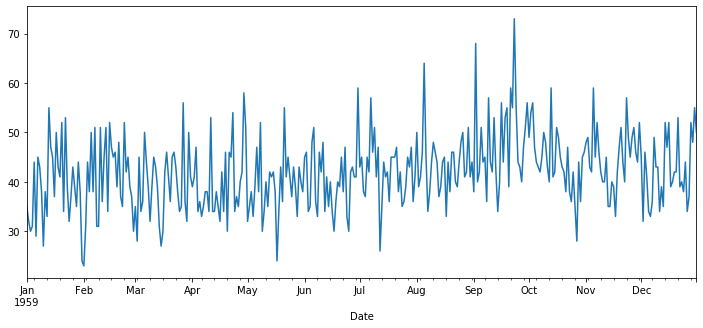

In [31]:
df1['Births'].plot(figsize=(12,5));

# stationary data

In [32]:
from pandas.plotting import lag_plot

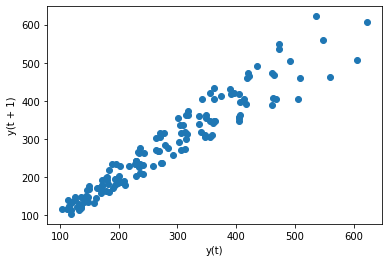

In [33]:
lag_plot(df['Thousands of Passengers']);

# non-stationary data

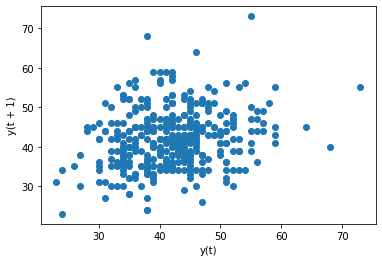

In [34]:
lag_plot(df1['Births']);

# stationary data

In [35]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

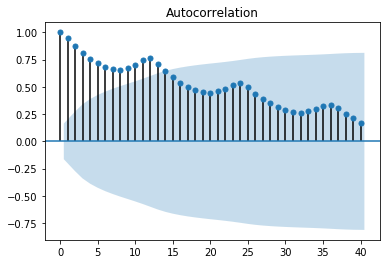

In [36]:
plot_acf(df['Thousands of Passengers'], lags=40 );

# stationary

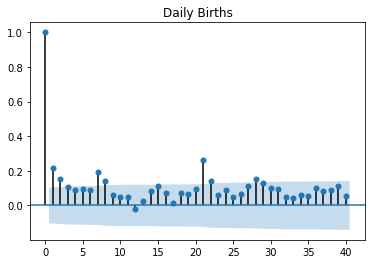

In [37]:
plot_acf(df1['Births'], lags=40, title = 'Daily Births' );

# nonstationary

# ACF / PACF values

In [38]:
from statsmodels.tsa.stattools import acf, pacf_yw, pacf_ols

In [39]:
print('ACF: ', acf(df['Thousands of Passengers'], nlags=5))

ACF:  [1.         0.94804734 0.87557484 0.80668116 0.75262542 0.71376997]


In [40]:
print('ACF: ', acf(df1['Births'], nlags=5))

ACF:  [1.         0.21724118 0.15287758 0.10821254 0.09066059 0.09595481]


In [41]:
print('MLE Mehtod\t', pacf_yw(df['Thousands of Passengers'], method='mle', nlags=5))
print()
print('Unbiased Method ', pacf_yw(df['Thousands of Passengers'],  nlags=5))


MLE Mehtod	 [ 1.          0.94804734 -0.22942187  0.03814778  0.09378544  0.0736067 ]

Unbiased Method  [ 1.          0.95467704 -0.26527732  0.05546955  0.10885622  0.08112579]


In [42]:
print('PACF_OLS: ', pacf_ols(df['Thousands of Passengers'],nlags=5))


PACF_OLS:  [ 1.          0.95893198 -0.32983096  0.2018249   0.14500798  0.25848232]
